## Crypto Arbitrage
The Cryptocurrency Arbitrage notebook provides an example of how one can use Jupyter and Python to perform an arbitrage analysis based on historical Bitcoin trade data from two cryptocurrency exchanges, Bitstamp and Coinbase.

The notebook is divided into the following phases:

1. Collect the Data - In this phase, the historical Bitcoin trade data is imported via csv files that are exported from Bitstamp and Coinbase.
2. Prepare the Data - In this phase, the Bitcoin trade data is cleansed and prepared for analysis. All missing data is removed, all '$' characters under the 'Close' column are removed, the 'Close' column is converted to float datatype and any duplicate data is removed.
3. Analyze the Data - In the last phase, we analyze and calculate arbitrage profits for different periods to see if there are any opportunities for arbitrage.


###  Import the required libraries and dependencies.

In [2]:
import pandas as pd
from pathlib import Path
%matplotlib inline

## Collect the Data

In this phase, we perform the following steps:

1. Import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

2. Use the `head` function to confirm that Pandas properly imported the data.

3. Repeat Steps 1 and 2 for `coinbase.csv` file.

### Step 1: Import the data from `bitstamp.csv` file, and create a DataFrame called `bitstamp`. Set the DatetimeIndex as the Timestamp column, and be sure to parse and format the dates.

In [3]:
# Read in the CSV file called "bitstamp.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Date"
# Set the parse_dates and infer_datetime_format parameters
bitstamp = pd.read_csv(
    Path('./Resources/bitstamp.csv'), 
    index_col='Timestamp',
    parse_dates=True, 
    infer_datetime_format=True)
bitstamp = bitstamp.rename(columns={"Timestamp":"Date"})

### Step 2: Use the `head` function to confirm that Pandas properly imported the data.

In [4]:
# Use the head function to confirm that the data was imported properly.
bitstamp.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329


### Step 3: Repeat Steps 1 and 2 for `coinbase.csv` file.

In [5]:
# Read in the CSV file called "coinbase.csv" using the Path module. 
# The CSV file is located in the Resources folder.
# Set the index to the column "Timestamp"
# Set the parse_dates and infer_datetime_format parameters
coinbase = pd.read_csv(
    Path('./Resources/coinbase.csv'), 
    index_col='Timestamp',
    parse_dates=True, 
    infer_datetime_format=True)
coinbase = coinbase.rename(columns={"Timestamp":"Date"})

In [6]:
# Use the head (and/or tail) function to confirm that the data was imported properly.
coinbase.head()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,$13608.49,20.812754,283451.08537,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,$13601.66,13.474359,183283.97801,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,$13580.0,11.536360,156789.19686,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,$13550.34,16.328039,221413.64182,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,$13583.44,9.955364,135141.26944,13574.719401


## Prepare the Data

In this phase, we prepare and clean our data for analysis with the following steps:

1. For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

2. Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

3. Convert the data type of the Close column to a `float`.

4. Review the data for duplicated values, and drop them if necessary.

5. Repeat Steps 1–4 for the coinbase DataFrame.

### Step 1: For the bitstamp DataFrame, replace or drop all `NaN`, or missing, values in the DataFrame.

In [7]:
# For the bitstamp DataFrame, replace or drop all NaNs or missing values in the DataFrame
bitstamp.dropna()
bitstamp

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,$13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,$13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,$13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,$13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,$13620.0,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,$6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,$6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,$6934.72,28.239049,195789.408220,6933.286106


### Step 2: Use the `str.replace` function to remove the dollar signs ($) from the values in the Close column.

In [8]:
# Use the str.replace function to remove the dollar sign, $
bitstamp.loc[:, 'Close'] = bitstamp.loc[:, 'Close'].str.replace("$", "", regex=True)


### Step 3: Convert the data type of the Close column to a `float`.

In [9]:
# Convert the Close data type to a float
bitstamp.loc[:, 'Close'] = bitstamp.loc[:, 'Close'].astype('float')


### Step 4: Review the data for duplicated values, and drop them if necessary.

In [10]:
# Review the data for duplicate values, and drop them if necessary
bitstamp.duplicated()
bitstamp.drop_duplicates()



,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13681.04,13681.04,13637.93,13646.48,3.334553,45482.128785,13639.647479
2018-01-01 00:01:00,13646.48,13658.75,13610.18,13658.75,2.663188,36361.390888,13653.332816
2018-01-01 00:02:00,13616.93,13616.93,13610.06,13610.22,0.084653,1152.144036,13610.136247
2018-01-01 00:03:00,13610.27,13639.09,13610.27,13639.09,7.182986,97856.416478,13623.361128
2018-01-01 00:04:00,13635.35,13636.35,13620.00,13620.00,1.069665,14582.660932,13632.923329
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6935.01,6939.07,6922.56,6922.56,1.044354,7240.034602,6932.550078
2018-03-31 23:56:00,6922.02,6922.02,6918.00,6920.32,3.069539,21245.076275,6921.260233
2018-03-31 23:57:00,6920.33,6936.42,6920.33,6934.72,28.239049,195789.408220,6933.286106


### Step 5: Repeat Steps 1–4 for the coinbase DataFrame.

In [11]:
# Repeat Steps 1–4 for the coinbase DataFrame
# Step 1. For the coinbase DataFrame, replace or drop all NaNs or missing values in the DataFrame
coinbase.dropna()

# Step 2. Use the str.replace function to remove the dollar sign, $
coinbase.loc[:, 'Close'] = coinbase.loc[:, 'Close'].str.replace("$", "", regex=False)

# Step 3. Convert the Close data type to a float
coinbase.loc[:, 'Close'] = coinbase.loc[:, 'Close'].astype('float')

# Step 4. Review the data for duplicate values, and drop them if necessary
coinbase.duplicated().sum()
coinbase.drop_duplicates()

,Open,High,Low,Close,BTC Volume,USD Volume,Weighted Price
Timestamp,,,,,,,
2018-01-01 00:00:00,13620.00,13620.00,13608.49,13608.49,20.812754,283451.085370,13619.105106
2018-01-01 00:01:00,13607.14,13607.14,13601.66,13601.66,13.474359,183283.978010,13602.426919
2018-01-01 00:02:00,13601.44,13601.44,13580.00,13580.00,11.536360,156789.196860,13590.872506
2018-01-01 00:03:00,13587.31,13587.31,13542.70,13550.34,16.328039,221413.641820,13560.332806
2018-01-01 00:04:00,13550.34,13585.95,13550.34,13583.44,9.955364,135141.269440,13574.719401
...,...,...,...,...,...,...,...
2018-03-31 23:55:00,6945.20,6948.06,6930.00,6930.00,5.802288,40243.918480,6935.869979
2018-03-31 23:56:00,6930.00,6930.01,6930.00,6930.01,0.625053,4331.620701,6930.005567
2018-03-31 23:57:00,6930.01,6933.91,6930.01,6933.91,0.776431,5382.532162,6932.405747


## Analyze the Data

The analysis phase consists of the following tasks: 

1. Choose the columns of data on which to focus the analysis.

2. Get the summary statistics and plot the data.

3. Focus analysis on specific dates.

4. Calculate the arbitrage profits.

### Step 1: Choose columns of data on which to focus analysis.

Select the data we want to analyze. Use `loc` or `iloc` to select the following columns of data for both the bitstamp and coinbase DataFrames:

* Timestamp (index)

* Close


In [12]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from bitstamp DataFrame
bitstamp_sliced = bitstamp.loc[:, 'Close']

# Review the first five rows of the DataFrame
bitstamp_sliced.head()

Timestamp
2018-01-01 00:00:00    13646.48
2018-01-01 00:01:00    13658.75
2018-01-01 00:02:00    13610.22
2018-01-01 00:03:00    13639.09
2018-01-01 00:04:00    13620.00
Name: Close, dtype: float64

In [13]:
# Use loc or iloc to select `Timestamp (the index)` and `Close` from coinbase DataFrame
coinbase_sliced = coinbase.loc[:, 'Close']

# Review the first five rows of the DataFrame
coinbase_sliced.head()

Timestamp
2018-01-01 00:00:00    13608.49
2018-01-01 00:01:00    13601.66
2018-01-01 00:02:00    13580.00
2018-01-01 00:03:00    13550.34
2018-01-01 00:04:00    13583.44
Name: Close, dtype: float64

### Step 2: Get summary statistics and plot the data.

Sort through the time series data associated with the bitstamp and coinbase DataFrames to identify potential arbitrage opportunities. This is accomplished with the following steps:

1. Generate the summary statistics for each DataFrame by using the `describe` function.

2. For each DataFrame, create a line plot for the full period of time in the dataset. 

3. In one plot, overlay the visualizations for bitstamp and coinbase. 

4. Using the `loc` and `plot` functions, plot the price action of the assets on each exchange for different dates and times. 

In [14]:
# Generate the summary statistics for the bitstamp DataFrame
bitstamp_sliced.describe()

count    129067.000000
mean      10459.842453
std        2315.976088
min        5944.000000
25%        8613.370000
50%       10145.950000
75%       11444.810000
max       17234.980000
Name: Close, dtype: float64

In [15]:
# Generate the summary statistics for the coinbase DataFrame
coinbase_sliced.describe()

count    129322.000000
mean      10449.140958
std        2317.197419
min        5882.310000
25%        8609.230000
50%       10137.440000
75%       11397.237500
max       17177.990000
Name: Close, dtype: float64

<AxesSubplot:title={'center':'Bitstamp'}, xlabel='Timestamp'>

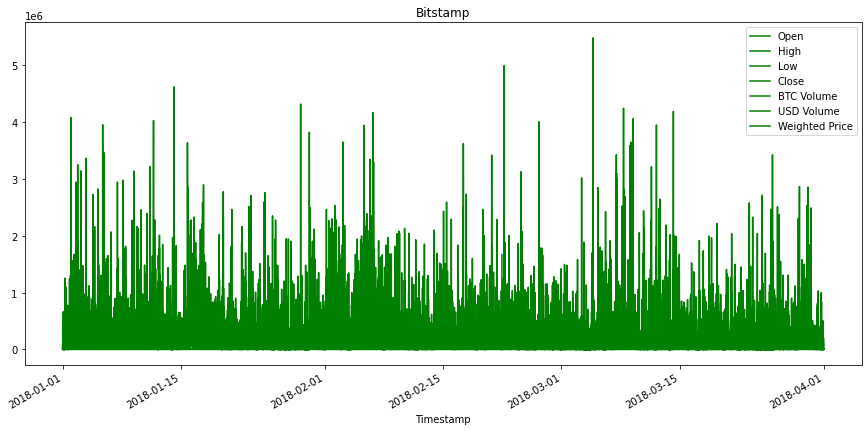

In [16]:
# Create a line plot for the bitstamp DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
bitstamp.plot(
    kind='line', 
    figsize=(15,7),
    title='Bitstamp', 
    color='green')

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

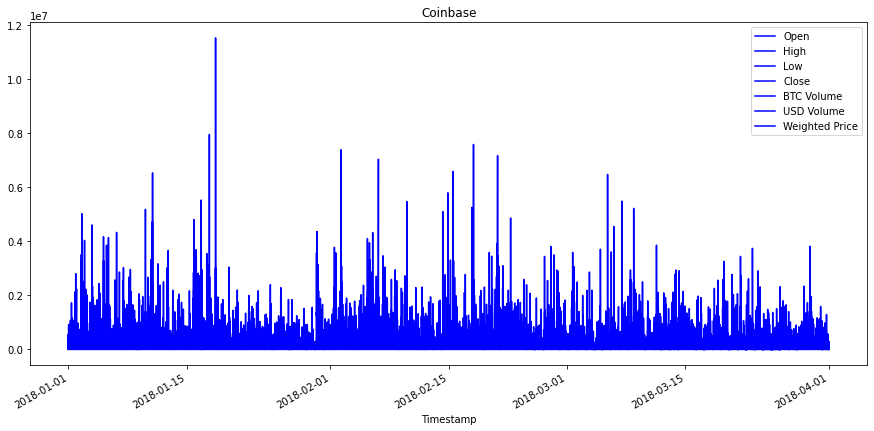

In [17]:
# Create a line plot for the coinbase DataFrame for the full length of time in the dataset 
# Be sure that the figure size, title, and color are tailored to each visualization
coinbase.plot(
    kind='line', 
    figsize=(15,7),
    title='Coinbase',
    color='blue')

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

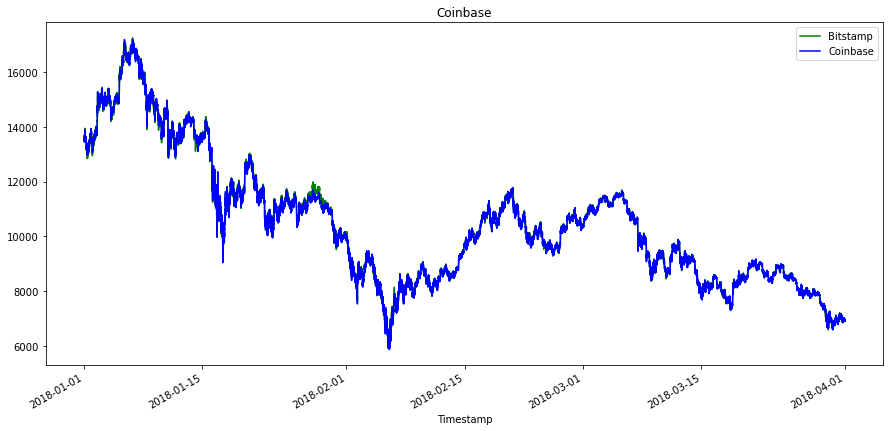

In [18]:
# Overlay the visualizations for the bitstamp and coinbase DataFrames in one plot
# The plot should visualize the prices over the full lenth of the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].plot(
    legend=True, figsize=(15,7), title='Bitstamp', 
    color='green', label='Bitstamp')
coinbase['Close'].plot(
    legend=True, figsize=(15,7), title='Coinbase', 
    color='blue', label='Coinbase')

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

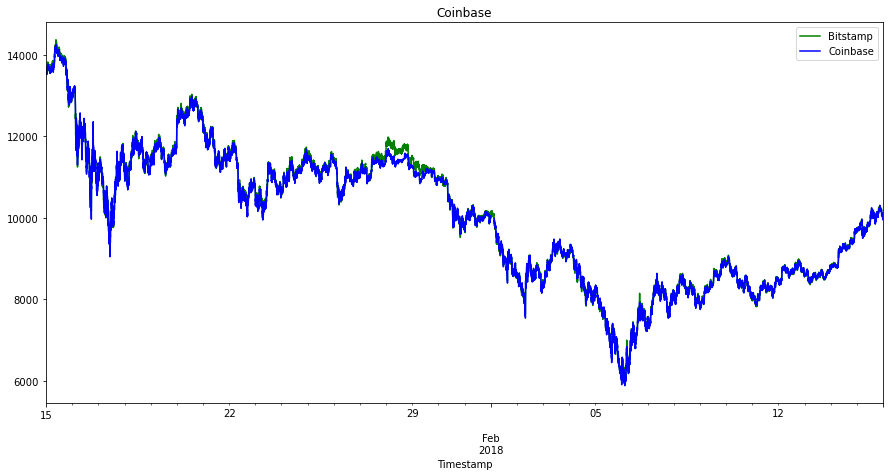

In [19]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period early in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label
bitstamp['Close'].loc['2018-01-15' : '2018-02-15'].plot(
    legend=True, figsize=(15,7), title='Bitstamp', 
    color='green', label='Bitstamp')
coinbase['Close'].loc['2018-01-15' : '2018-02-15'].plot(
    legend=True, figsize=(15,7), title='Coinbase', 
    color='blue', label='Coinbase')

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

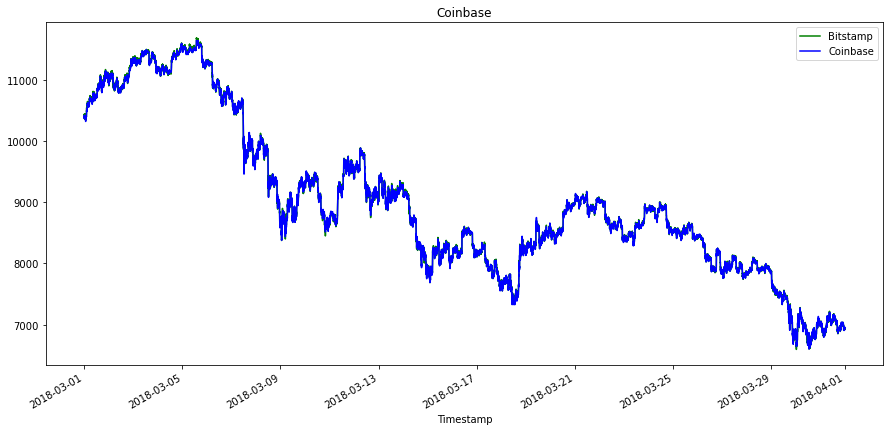

In [20]:
# Using the loc and plot functions, create an overlay plot that visualizes 
# the price action of both DataFrames for a one month period later in the dataset
# Be sure to include the parameters: legend, figure size, title, and color and label 
bitstamp['Close'].loc['2018-03-01' : '2018-04-01'].plot(
    legend=True, figsize=(15,7), title='Bitstamp', 
    color='green', label='Bitstamp')
coinbase['Close'].loc['2018-03-01' : '2018-04-01'].plot(
    legend=True, figsize=(15,7), title='Coinbase', 
    color='blue', label='Coinbase')

**Question** Based on the visualizations of the different time periods, has the degree of spread change as time progressed?

**Answer** Yes, the spread has become negligible later on and it appears that the pricing between Coinbase and Bitstamp are in sync.   There does not appear to be arbitrage opportunities later on in 2018.

### Step 3: Analysis on Specific Dates (Early, Middle, Late)

In this step, we focus our analysis on specific dates by completing the following steps:

1. Select three dates to evaluate for arbitrage profitability. For our example, we have chosen the following three dates:
- Early: 2018-01-29
- Middle: 2018-02-28
- Late: 2018-03-29

2. For each of the three dates, we generate the summary statistics and then create a box plot. This big-picture view is meant to help us gain a better understanding of the data before we perform your arbitrage calculations. 

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

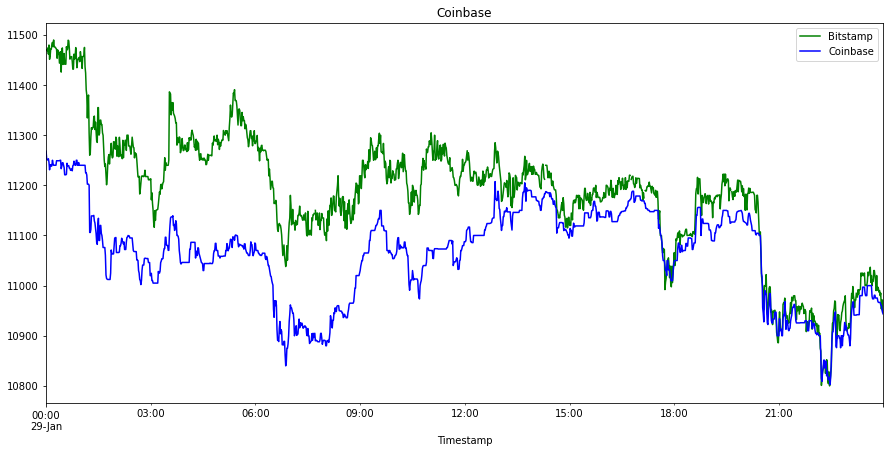

In [21]:
# Create an overlay plot that visualizes the two dataframes over a period of one day early in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-01-29'].plot(
    legend=True, figsize=(15,7), title='Bitstamp', 
    color='green', label='Bitstamp')
coinbase['Close'].loc['2018-01-29'].plot(
    legend=True, figsize=(15,7), title='Coinbase', 
    color='blue', label='Coinbase')

In [22]:
# Using the early date that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-29'] - coinbase['Close'].loc['2018-01-29']

# Generate summary statistics for the early DataFrame
arbitrage_spread_early.describe()

count    1430.000000
mean      120.214510
std        85.164846
min       -48.010000
25%        37.002500
50%       132.420000
75%       203.237500
max       300.270000
Name: Close, dtype: float64

<AxesSubplot:>

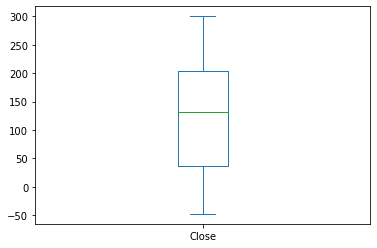

In [23]:
# Visualize the arbitrage spread from early in the dataset in a box plot
arbitrage_spread_early.plot(kind='box')

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

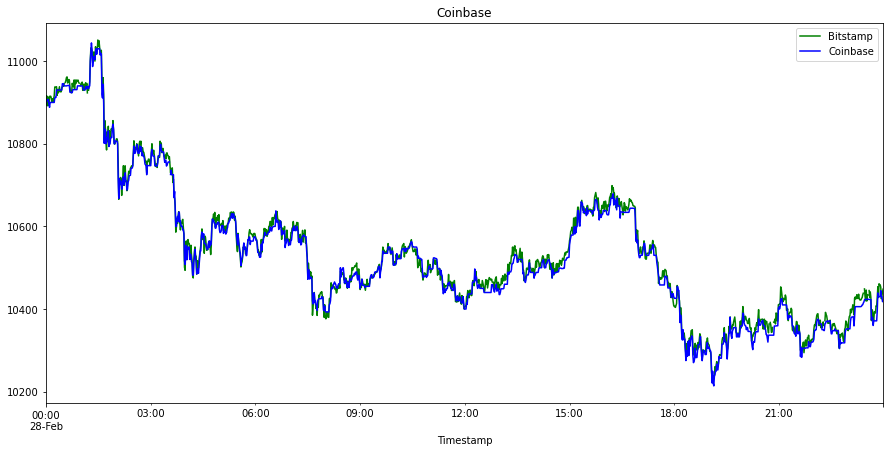

In [24]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from the middle of the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-02-28'].plot(
    legend=True, figsize=(15,7), title='Bitstamp', 
    color='green', label='Bitstamp')
coinbase['Close'].loc['2018-02-28'].plot(
    legend=True, figsize=(15,7), title='Coinbase', 
    color='blue', label='Coinbase')

In [25]:
# Using the date in the middle that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-28'] - coinbase['Close'].loc['2018-02-28']

# Generate summary statistics 
arbitrage_spread_middle.describe()

count    1430.000000
mean        7.755825
std        11.296502
min       -35.000000
25%         0.145000
50%         7.815000
75%        15.207500
max        46.000000
Name: Close, dtype: float64

<AxesSubplot:>

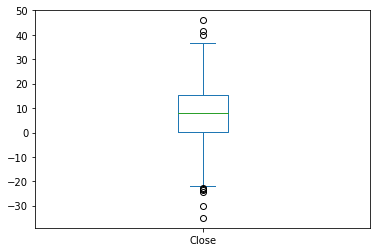

In [26]:
# Visualize the arbitrage spread from the middle of the dataset in a box plot
arbitrage_spread_middle.plot(kind='box')

<AxesSubplot:title={'center':'Coinbase'}, xlabel='Timestamp'>

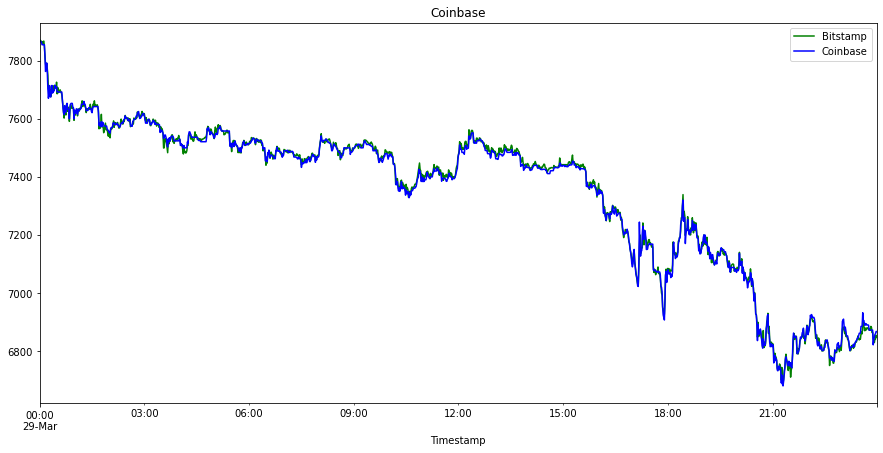

In [27]:
# Create an overlay plot that visualizes the two dataframes over a period of one day from late in the dataset. 
# Be sure that the plots include the parameters `legend`, `figsize`, `title`, `color` and `label` 
bitstamp['Close'].loc['2018-03-29'].plot(
    legend=True, figsize=(15,7), title='Bitstamp', 
    color='green', label='Bitstamp')
coinbase['Close'].loc['2018-03-29'].plot(
    legend=True, figsize=(15,7), title='Coinbase', 
    color='blue', label='Coinbase')

In [28]:
# Using the date from the late that you have selected, calculate the arbitrage spread 
# by subtracting the bitstamp lower closing prices from the coinbase higher closing prices
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-29'] - coinbase['Close'].loc['2018-03-29']

# Generate summary statistics for the late DataFrame
arbitrage_spread_late.describe()

count    1440.000000
mean        2.787611
std        10.030143
min       -89.900000
25%        -2.942500
50%         3.645000
75%         9.132500
max        45.600000
Name: Close, dtype: float64

<AxesSubplot:>

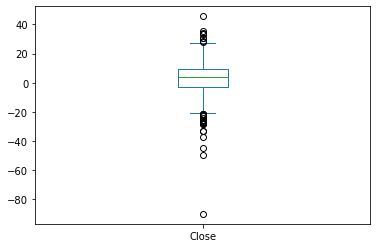

In [29]:
# Visualize the arbitrage spread from late in the dataset in a box plot
arbitrage_spread_late.plot(kind='box')

### Step 4: Calculate the Arbitrage Profits

Calculate the potential profits for each date selected in the previous section. The goal is to determine whether arbitrage opportunities still exist in the Bitcoin market. To do so, we complete the following steps:

1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

3. For each of the three dates, narrow down your trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

4. Generate the summary statistics of your spread returns that are greater than 1%. How do the average returns compare among the three dates?

5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

6. Generate the summary statistics, and plot the results for each of the three DataFrames.

7. Calculate the potential arbitrage profits that you can make on each day. To do so, sum the elements in the profit_per_trade DataFrame.

8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?


#### 1. For each of the three dates, measure the arbitrage spread between the two exchanges by subtracting the lower-priced exchange from the higher-priced one. Then use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame, where the spread is greater than zero.

*NOTE*: For illustration, only one of the three dates is shown in the starter code below.

In [31]:
# For the date early in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_early = bitstamp['Close'].loc['2018-01-29'] - coinbase['Close'].loc['2018-01-29']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_early.describe()


count    1430.000000
mean      120.214510
std        85.164846
min       -48.010000
25%        37.002500
50%       132.420000
75%       203.237500
max       300.270000
Name: Close, dtype: float64

In [64]:
# For the date in the middle of the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_middle = bitstamp['Close'].loc['2018-02-28'] - coinbase['Close'].loc['2018-02-28']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_middle.describe()


count    1430.000000
mean        7.755825
std        11.296502
min       -35.000000
25%         0.145000
50%         7.815000
75%        15.207500
max        46.000000
Name: Close, dtype: float64

In [33]:
# For the date late in the dataset, measure the arbitrage spread between the two exchanges
# by subtracting the lower-priced exchange from the higher-priced one
arbitrage_spread_late = bitstamp['Close'].loc['2018-03-29'] - coinbase['Close'].loc['2018-03-29']

# Use a conditional statement to generate the summary statistics for each arbitrage_spread DataFrame
arbitrage_spread_late.describe()


count    1440.000000
mean        2.787611
std        10.030143
min       -89.900000
25%        -2.942500
50%         3.645000
75%         9.132500
max        45.600000
Name: Close, dtype: float64

#### 2. For each of the three dates, calculate the spread returns. To do so, divide the instances that have a positive arbitrage spread (that is, a spread greater than zero) by the price of Bitcoin from the exchange you’re buying on (that is, the lower-priced exchange). Review the resulting DataFrame.

In [34]:
# For the date early in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_early = arbitrage_spread_early[arbitrage_spread_early > 0] / bitstamp['Close'].loc['2018-01-29']

# Review the spread return DataFrame
spread_return_early.head()


Timestamp
2018-01-29 00:00:00    0.017609
2018-01-29 00:01:00    0.018919
2018-01-29 00:02:00    0.018941
2018-01-29 00:03:00    0.019454
2018-01-29 00:04:00    0.018203
Name: Close, dtype: float64

In [35]:
# For the date middle in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_middle = arbitrage_spread_middle[arbitrage_spread_middle > 0] / bitstamp['Close'].loc['2018-02-28']

# For date later in the dataset...
spread_return_middle.head()


Timestamp
2018-02-28 00:00:00    0.001479
2018-02-28 00:01:00    0.001315
2018-02-28 00:02:00         NaN
2018-02-28 00:03:00    0.000604
2018-02-28 00:04:00         NaN
Name: Close, dtype: float64

In [36]:
# For the date late in the dataset, calculate the spread returns by dividing the instances when the arbitrage spread is positive (> 0) 
# by the price of Bitcoin from the exchange you are buying on (the lower-priced exchange).
spread_return_late = arbitrage_spread_late[arbitrage_spread_late > 0] / bitstamp['Close'].loc['2018-03-29']

# Review the spread return DataFrame
spread_return_late.head()


Timestamp
2018-03-29 00:00:00    0.000185
2018-03-29 00:01:00    0.000498
2018-03-29 00:02:00    0.000282
2018-03-29 00:03:00    0.000285
2018-03-29 00:04:00    0.001217
Name: Close, dtype: float64

#### 3. For each of the three dates, narrow down the trading opportunities even further. To do so, determine the number of times your trades with positive returns exceed the 1% minimum threshold that you need to cover your costs.

In [37]:
# For the date early in the dataset, determine the number of times your trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_early = spread_return_early[spread_return_early > 0.01]

# Review the first five profitable trades
profitable_trades_early.head()


Timestamp
2018-01-29 00:00:00    0.017609
2018-01-29 00:01:00    0.018919
2018-01-29 00:02:00    0.018941
2018-01-29 00:03:00    0.019454
2018-01-29 00:04:00    0.018203
Name: Close, dtype: float64

In [38]:
# For the date in middle of the dataset, determine the number of times the trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_middle = spread_return_middle[spread_return_middle > 0.01]

# Review the first five profitable trades
profitable_trades_middle.head()

Series([], Name: Close, dtype: float64)

In [39]:
# For the date late in the dataset, determine the number of times the trades with positive returns 
# exceed the 1% minimum threshold (.01) that you need to cover your costs
profitable_trades_late = spread_return_late[spread_return_late > 0.01]

# Review the first five profitable trades
profitable_trades_late.head()

Series([], Name: Close, dtype: float64)

#### 4. Generate the summary statistics of spread returns that are greater than 1%. How do the average returns compare among the three dates?

In [40]:
# For the date early in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_early.describe()

count    741.000000
mean       0.017485
std        0.003024
min        0.010003
25%        0.015157
50%        0.017908
75%        0.019671
max        0.026361
Name: Close, dtype: float64

In [41]:
# For the date in middle of the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_middle.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

In [42]:
# For the date late in the dataset, generate the summary statistics for the profitable trades
# or you trades where the spread returns are are greater than 1%
profitable_trades_late.describe()

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: Close, dtype: float64

#### 5. For each of the three dates, calculate the potential profit, in dollars, per trade. To do so, multiply the spread returns that were greater than 1% by the cost of what was purchased. Make sure to drop any missing values from the resulting DataFrame.

In [43]:
# For the date early in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_early = profitable_trades_early * bitstamp['Close'].loc['2018-01-29']

# Drop any missing values from the profit DataFrame
profit_per_trade_early = profit_early.dropna()

# View the early profit DataFrame
profit_per_trade_early

Timestamp
2018-01-29 00:00:00    201.98
2018-01-29 00:01:00    217.00
2018-01-29 00:02:00    217.22
2018-01-29 00:03:00    223.22
2018-01-29 00:04:00    208.64
                        ...  
2018-01-29 12:20:00    117.64
2018-01-29 12:24:00    116.54
2018-01-29 12:31:00    128.44
2018-01-29 12:33:00    121.93
2018-01-29 12:39:00    112.75
Name: Close, Length: 741, dtype: float64

In [44]:
# For the date in the middle of the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_middle = profitable_trades_middle * bitstamp['Close'].loc['2018-02-28']

# Drop any missing values from the profit DataFrame
profit_per_trade_middle = profit_middle.dropna()

# View the middle profit DataFrame
profit_per_trade_middle

Series([], Name: Close, dtype: float64)

In [45]:
# For the date late in the dataset, calculate the potential profit per trade in dollars 
# Multiply the profitable trades by the cost of the Bitcoin that was purchased
profit_late = profitable_trades_late * bitstamp['Close'].loc['2018-03-29']

# Drop any missing values from the profit DataFrame
profit_per_trade_late = profit_late.dropna()

# View the early profit DataFrame
profit_per_trade_late

Series([], Name: Close, dtype: float64)

#### 6. Generate the summary statistics, and plot the results for each of the three DataFrames.

<AxesSubplot:xlabel='Timestamp'>

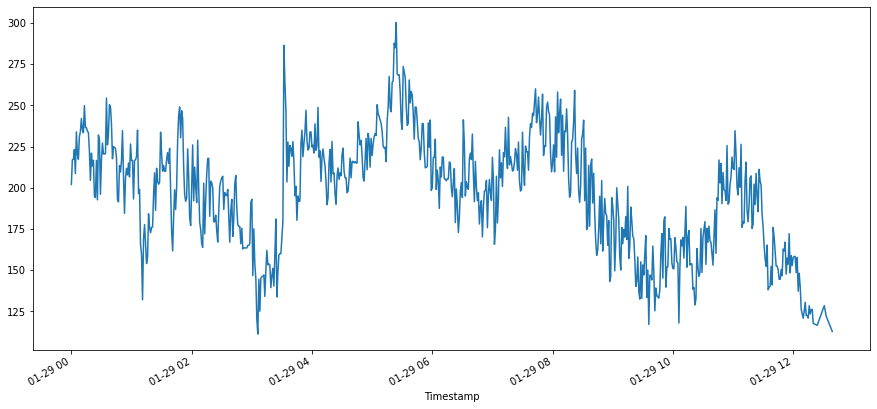

In [47]:
# Generate the summary statistics for the early profit per trade DataFrame
profit_per_trade_early.describe()

profit_per_trade_early.plot(figsize=(15, 7))

<AxesSubplot:xlabel='Timestamp'>

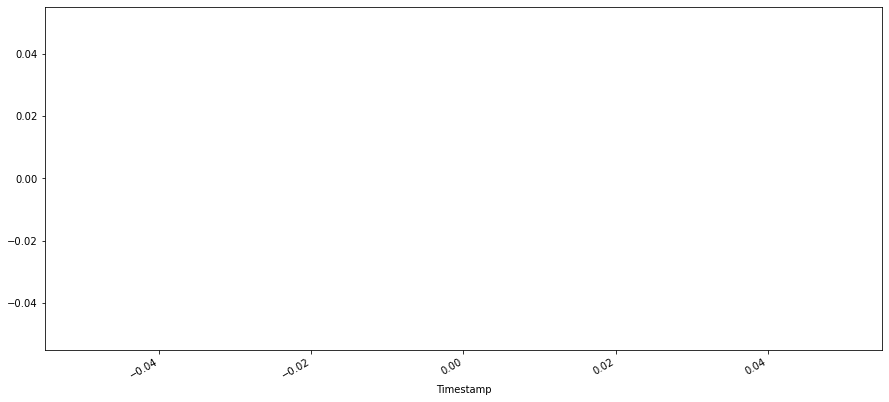

In [51]:
# Generate the summary statistics for the middle profit per trade DataFrame
profit_per_trade_middle.describe()

profit_per_trade_middle.plot(figsize=(15, 7))

<AxesSubplot:xlabel='Timestamp'>

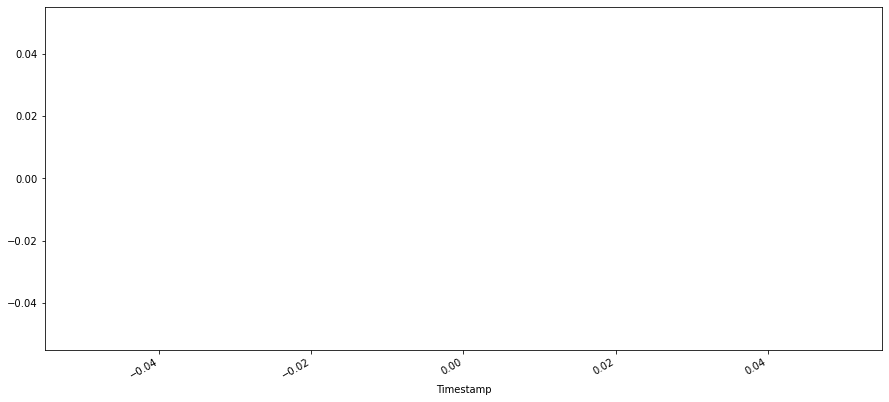

In [52]:
# Generate the summary statistics for the late profit per trade DataFrame
profit_per_trade_late.describe()

profit_per_trade_late.plot(figsize=(15, 7))

#### 7. Calculate the potential arbitrage profits that can be made on each day. To do so, sum the elements in the profit_per_trade DataFrame.

In [53]:
# Calculate the sum of the potential profits for the early profit per trade DataFrame
profit_sum_early = profit_per_trade_early.sum()
profit_sum_early

145857.83999999997

In [54]:
# Calculate the sum of the potential profits for the middle profit per trade DataFrame
profit_sum_middle = profit_per_trade_middle.sum()
profit_sum_middle

0.0

In [55]:
# Calculate the sum of the potential profits for the late profit per trade DataFrame
profit_sum_late = profit_per_trade_late.sum()
profit_sum_late

0.0

#### 8. Using the `cumsum` function, plot the cumulative sum of each of the three DataFrames. Can you identify any patterns or trends in the profits across the three time periods?

In [56]:
# Use the cumsum function to calculate the cumulative profits over time for the early profit per trade DataFrame
cumulative_profit_early = profit_per_trade_early.cumsum()
cumulative_profit_early

Timestamp
2018-01-29 00:00:00       201.98
2018-01-29 00:01:00       418.98
2018-01-29 00:02:00       636.20
2018-01-29 00:03:00       859.42
2018-01-29 00:04:00      1068.06
                         ...    
2018-01-29 12:20:00    145378.18
2018-01-29 12:24:00    145494.72
2018-01-29 12:31:00    145623.16
2018-01-29 12:33:00    145745.09
2018-01-29 12:39:00    145857.84
Name: Close, Length: 741, dtype: float64

<AxesSubplot:title={'center':'Cumulative Sum - Early Date'}, xlabel='Timestamp'>

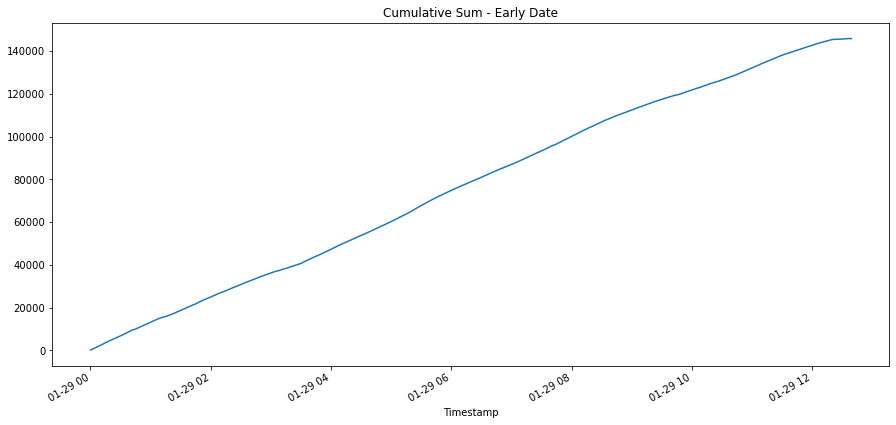

In [58]:
# Plot the cumulative sum of profits for the early profit per trade DataFrame
cumulative_profit_early.plot(figsize=(15, 7), title="Cumulative Sum - Early Date")

In [59]:
# Use the cumsum function to calculate the cumulative profits over time for the middle profit per trade DataFrame
cumulative_profit_middle = profit_per_trade_middle.cumsum()
cumulative_profit_middle


Series([], Name: Close, dtype: float64)

<AxesSubplot:title={'center':'Cumulative Sum - Middle Date'}, xlabel='Timestamp'>

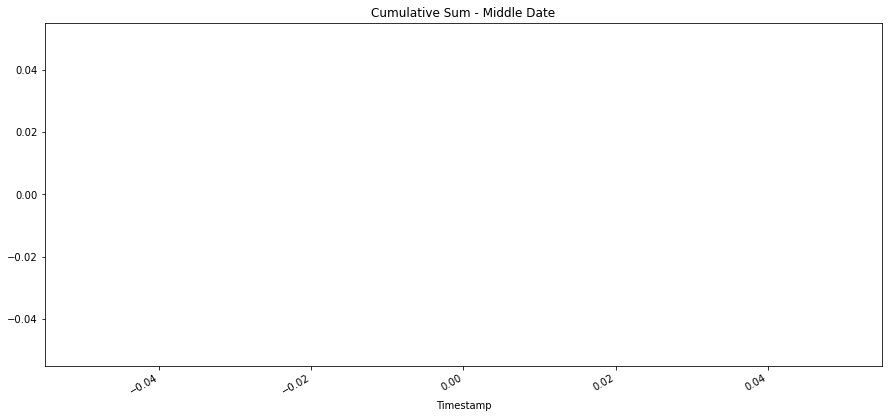

In [60]:
# Plot the cumulative sum of profits for the middle profit per trade DataFrame
cumulative_profit_middle.plot(figsize=(15, 7), title="Cumulative Sum - Middle Date")

In [62]:
# Use the cumsum function to calculate the cumulative profits over time for the late profit per trade DataFrame
cumulative_profit_late = profit_per_trade_late.cumsum()
cumulative_profit_late

Series([], Name: Close, dtype: float64)

<AxesSubplot:title={'center':'Cumulative Sum - Late Date'}, xlabel='Timestamp'>

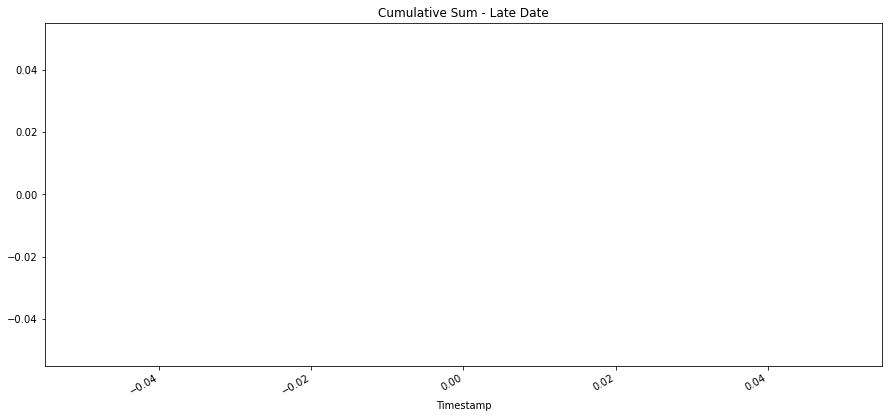

In [63]:
# Plot the cumulative sum of profits for the late profit per trade DataFrame
cumulative_profit_late.plot(figsize=(15, 7), title="Cumulative Sum - Late Date")

**Question:** After reviewing the profit information across each date from the different time periods, can you identify any patterns or trends?
    
**Answer:** In the early date that we chose (2018-01-01), there are a large number of profitable trades.  However, with the middle and late dates, there are no profitable trades.  This seems to imply that the arbitrage opportunities are on a downward trend.